In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Basic Structure info

In [2]:
df = pd.read_csv('data/anime_recommendation_dataset.csv')

print("--- shape ---")
print(df.shape)

print("\n--- columns ---")
print(df.columns)

print("\n--- info ---")
print(df.info())

print("\n--- types ---")
print(df.dtypes)

print("\n--- first 5 rows ---")
print(df.head())

print("\n--- missing values ---")
print(df.isnull().sum())

--- shape ---
(200, 6)

--- columns ---
Index(['title', 'synopsis', 'genres', 'episodes', 'score', 'characters'], dtype='object')

--- info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       200 non-null    object 
 1   synopsis    200 non-null    object 
 2   genres      200 non-null    object 
 3   episodes    199 non-null    float64
 4   score       200 non-null    int64  
 5   characters  198 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None

--- types ---
title          object
synopsis       object
genres         object
episodes      float64
score           int64
characters     object
dtype: object

--- first 5 rows ---
                             title  \
0                     Cowboy Bebop   
1  Cowboy Bebop: Tengoku no Tobira   
2                           TRIGUN   
3               Witch 

In [3]:
missing_episode_titles = df.loc[df['episodes'].isna(), 'title'].tolist()
print(f"\nTitles with missing episode counts: {missing_episode_titles}")
missing_character_titles = df.loc[df['characters'].isna(), 'title'].tolist()
print(f"\nTitles with missing character info: {missing_character_titles}")


Titles with missing episode counts: ['ONE PIECE']

Titles with missing character info: ["Gosenzo San'e", 'Shin Angel']


going to leave it for database, and handle it later during making payloads for VDB!

In [4]:
(
    df['genres']
    .fillna('').
    str.split(',')
    .explode()
    .str.strip()
    .value_counts()
)

genres
Drama            111
Comedy            99
Action            98
Romance           80
Sci-Fi            75
Adventure         69
Fantasy           54
Mecha             43
Supernatural      32
Slice of Life     20
Mystery           19
Ecchi             16
Sports            12
Psychological     12
Horror            12
Hentai             8
Mahou Shoujo       8
Music              3
Thriller           1
Name: count, dtype: int64

## Numerical summaries

In [ ]:
numeric_cols = ['score', 'episodes']

print("--- Descriptive Stats (score & episodes) ---")
print(df[numeric_cols].describe())

print("\n--- Unique scores ---")
print(df["score"].nunique())

print("\n--- Number of animes with missing episodes ---")
print(df["episodes"].isna().sum())

print("\n--- Episodes basic distribution (value counts for small episode counts) ---")
print(df["episodes"].value_counts().sort_values(ascending=False).head(10))

--- Descriptive Stats (score & episodes) ---
            score    episodes
count  200.000000  199.000000
mean    69.140000   24.422111
std      8.167247   26.785582
min     38.000000    1.000000
25%     64.000000   12.000000
50%     69.000000   24.000000
75%     74.250000   26.000000
max     88.000000  220.000000

--- Unique scores ---
37

--- Number of animes with missing episodes ---
1

--- Episodes basic distribution (value counts for small episode counts) ---
episodes
26.0    42
24.0    23
13.0    23
1.0     20
12.0    17
3.0      8
50.0     7
4.0      6
52.0     5
25.0     5
Name: count, dtype: int64


## Text based insights

In [6]:
genre_series = (
    df["genres"]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
)

genre_counts = genre_series.value_counts()

print("--- Top 20 Genres ---")
print(genre_counts.head(20))

df['num_characters'] = (
    df['characters']
    .fillna('')
    .apply(lambda x: len([c for c in x.split(',') if c.strip() !=""]))
)

print("\n--- Character Count Summary ---")
print(df['num_characters'].describe())


print("\n--- Top 5 animes with most characters ---")
print(df[['title', 'num_characters']].sort_values("num_characters", ascending=False).head(5))

df['synopsis_length'] = df['synopsis'].fillna('').str.len()

print('\n--- Synopsis Length Summary (number of characters)---')
print(df['synopsis_length'].describe())

print('\n--- Top 5 Longest synopsis ---')
print(df.loc[df["synopsis_length"].idxmax(), ['title', 'synopsis_length']])




--- Top 20 Genres ---
genres
Drama            111
Comedy            99
Action            98
Romance           80
Sci-Fi            75
Adventure         69
Fantasy           54
Mecha             43
Supernatural      32
Slice of Life     20
Mystery           19
Ecchi             16
Sports            12
Psychological     12
Horror            12
Hentai             8
Mahou Shoujo       8
Music              3
Thriller           1
Name: count, dtype: int64

--- Character Count Summary ---
count    200.000000
mean      18.035000
std        6.775938
min        0.000000
25%       14.000000
50%       19.000000
75%       25.000000
max       25.000000
Name: num_characters, dtype: float64

--- Top 5 animes with most characters ---
                              title  num_characters
0                      Cowboy Bebop              25
1   Cowboy Bebop: Tengoku no Tobira              25
2                            TRIGUN              25
5                      Eyeshield 21              25
11           

## Visualization

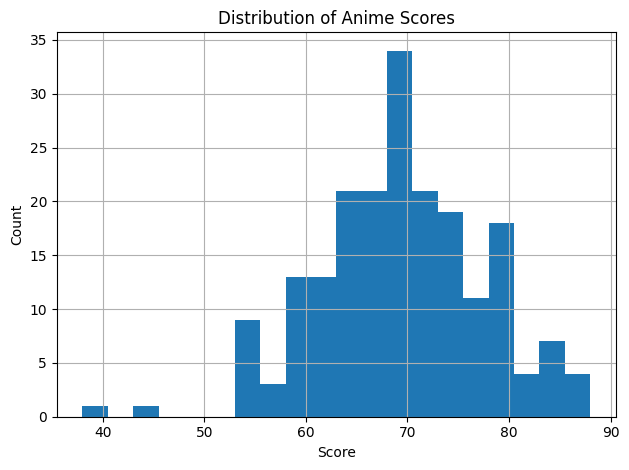

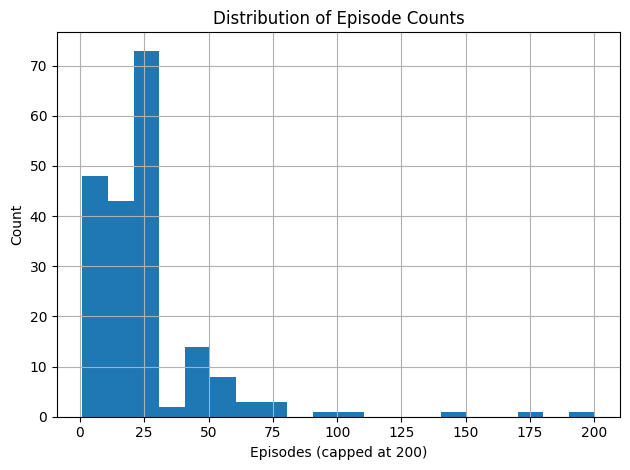

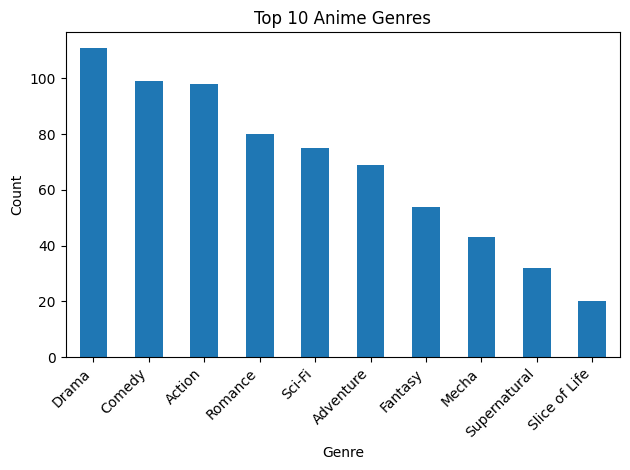

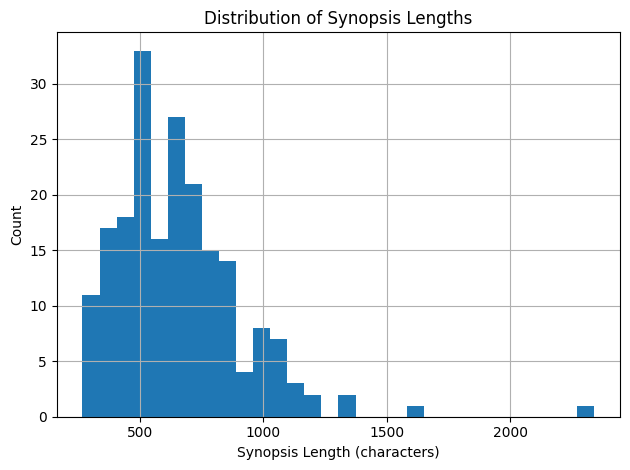

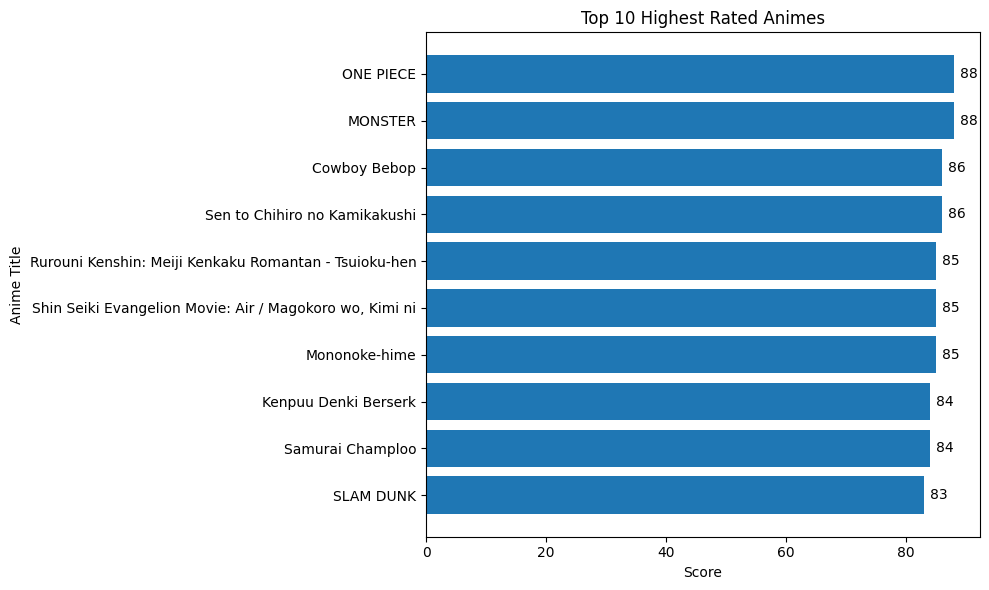

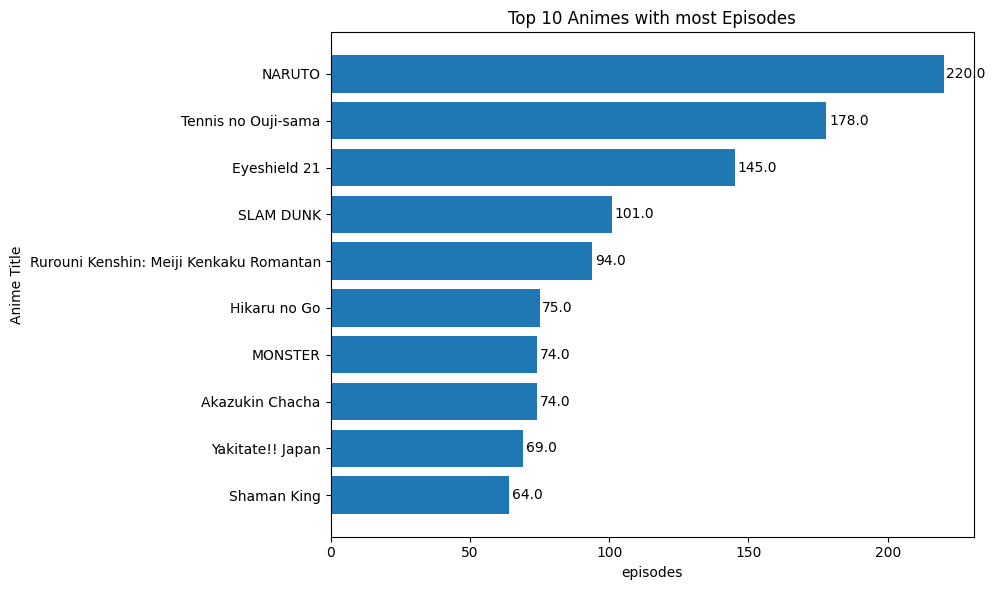

In [7]:
# Some info before visualizations
top_10_animes = df[['title', 'score']].sort_values("score", ascending=False).head(10)
top_10_episodes_animes = df[['title', 'episodes']].sort_values("episodes", ascending=False).head(10)


# 1. Historgram of scores
plt.figure()
df['score'].dropna().hist(bins=20)
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Distribution of Anime Scores")
plt.tight_layout()
plt.show()

# 2. Histogram of episodes (capped at 200 for bettter visualization)
plt.figure()
episodes_capped = df["episodes"].clip(upper=200)
episodes_capped.dropna().hist(bins=20)
plt.xlabel("Episodes (capped at 200)")
plt.ylabel("Count")
plt.title("Distribution of Episode Counts")
plt.tight_layout()
plt.show()


# 3. Top 10 generes plot
genre_series = (
    df['genres']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
)
genre_counts = genre_series.value_counts().head(10)

plt.figure()
genre_counts.plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 10 Anime Genres")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Synopsis length distribution
plt.figure()
df['synopsis_length'].dropna().hist(bins=30)
plt.xlabel("Synopsis Length (characters)")
plt.ylabel("Count")
plt.title("Distribution of Synopsis Lengths")
plt.tight_layout()
plt.show()

# 5. Highest rated animes
plt.figure(figsize=(10, 6))
plot_df = top_10_animes.iloc[::-1]
plt.barh(plot_df['title'], plot_df['score'])
for index, value in enumerate(plot_df['score']):
    plt.text(value + 1, index, str(value), va='center')
plt.xlabel("Score")
plt.ylabel("Anime Title")
plt.title("Top 10 Highest Rated Animes")
plt.tight_layout()

# 6. Animes with most episodes
plt.figure(figsize=(10, 6))
plot_df = top_10_episodes_animes.iloc[::-1]
plt.barh(plot_df['title'], plot_df['episodes'])
for index, value in enumerate(plot_df['episodes']):
    plt.text(value + 1, index, str(value), va='center')
plt.xlabel("episodes")
plt.ylabel("Anime Title")
plt.title("Top 10 Animes with most Episodes")
plt.tight_layout()

In [8]:
# Wait, why is one piece not first??
df.loc[df['title'] == 'ONE PIECE', 'episodes'].values[0]


np.float64(nan)

# Sentence Embeddings

In [9]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd

df = pd.read_csv("data/anime_recommendation_dataset.csv")
df["text"] = (
    df["title"].fillna("") + " " +
    df["genres"].fillna("") + " " +
    df["synopsis"].fillna("")
)

model = SentenceTransformer("multi-qa-MiniLM-L6-cos-v1")

embeddings = model.encode(
    df["text"].tolist(),
    batch_size=32,
    show_progress_bar=True
)

embeddings = np.array(embeddings)
print("Embedding shape:", embeddings.shape)

c:\Users\naeem\Desktop\anime_recommendation\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\naeem\Desktop\anime_recommendation\env\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\naeem\.cache\huggingface\hub\models--sentence-transformers--multi-qa-MiniLM-L6-cos-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Pyt

Embedding shape: (200, 384)


## Clustering


Under construction... 

Using clustering for recommendation by t-SNE or PCA (probably it is going to be t-SNE)

In [ ]:
# Let's add some useful columns for clustering
# Using score and episodes values for more clustering information
from sklearn.preprocessing import StandardScaler

numeric = df[["score", "episodes"]].fillna(0)
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric)